In [41]:
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis

    def get_neighbors(self, v):
        return self.adjac_lis[v]

    def h(self, n):
        H = {
            "Arad": 366,
            "Bucharest": 0,
            "Craiova": 160,
            "Drobeta": 242,
            "Eforie": 161,
            "Fagaras": 176,
            "Giurgiu": 77,
            "Hirsova": 151,
            "Iasi": 226,
            "Lugoj": 244,
            "Mehadia": 241,
            "Neamt": 234,
            "Oradea": 380,
            "Pitesti": 100,
            "Rimnicu": 193,
            "Sibiu": 253,
            "Timisoara": 329,
            "Urziceni": 80,
            "Vaslui": 199,
            "Zerind": 374,
        }
        return H[n]

    def a_star_algorithm(self, start, stop):
        open_lst = set([start])
        closed_lst = set([])

        poo = {}
        poo[start] = 0

        par = {}
        par[start] = start

        while len(open_lst) > 0:
            n = None

            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v

            if n == None:
                print("Ruta no existe!")
                return None

            if n == stop:
                reconst_path = []

                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]

                reconst_path.append(start)

                reconst_path.reverse()

                print("Ruta encontrada (nodos): {}".format(reconst_path))
                return reconst_path

            for m, weight in self.get_neighbors(n):
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n

                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)

            open_lst.remove(n)
            closed_lst.add(n)

        print("Esta ruta no existe")
        return None

In [42]:
adjac_lis = {
    "Arad": [("Zerind", 75), ("Sibiu", 140), ("Timisoara", 118)],
    "Zerind": [("Arad", 75), ("Oradea", 71)],
    "Oradea": [("Zerind", 71), ("Sibiu", 151)],
    "Sibiu": [("Arad", 140), ("Oradea", 151), ("Fagaras", 99), ("Rimnicu", 80)],
    "Timisoara": [("Arad", 118), ("Lugoj", 111)],
    "Lugoj": [("Timisoara", 111), ("Mehadia", 70)],
    "Mehadia": [("Lugoj", 70), ("Drobeta", 75)],
    "Drobeta": [("Mehadia", 75), ("Craiova", 120)],
    "Craiova": [("Drobeta", 120), ("Rimnicu", 146), ("Pitesti", 138)],
    "Rimnicu": [("Sibiu", 80), ("Craiova", 146), ("Pitesti", 97)],
    "Fagaras": [("Sibiu", 99), ("Bucharest", 211)],
    "Pitesti": [("Rimnicu", 97), ("Craiova", 138), ("Bucharest", 101)],
    "Bucharest": [
        ("Fagaras", 211),
        ("Pitesti", 101),
        ("Giurgiu", 90),
        ("Urziceni", 85),
    ],
    "Giurgiu": [("Bucharest", 90)],
    "Urziceni": [("Bucharest", 85), ("Hirsova", 98), ("Vaslui", 142)],
    "Hirsova": [("Urziceni", 98), ("Eforie", 86)],
    "Eforie": [("Hirsova", 86)],
    "Vaslui": [("Urziceni", 142), ("Iasi", 92)],
    "Iasi": [("Vaslui", 92), ("Neamt", 87)],
    "Neamt": [("Iasi", 87)],
}

grafo = Graph(adjac_lis)

grafo.a_star_algorithm("Arad", "Bucharest")

Ruta encontrada (nodos): ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']


['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']

In [43]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_graph(graph, start, goal):
    G = nx.Graph()

    for node, edges in graph.items():
        for edge, weight in edges:
            G.add_edge(node, edge, weight=weight)

    path = grafo.a_star_algorithm(start, goal)
    path_edges = list(zip(path, path[1:]))

    pos = nx.kamada_kawai_layout(G)

    plt.figure(figsize=(12, 8))

    nx.draw_networkx_nodes(G, pos, node_color="green", node_size=150, alpha=1)

    nx.draw_networkx_edges(
        G,
        pos,
        edge_color="gray",
        width=2,
        alpha=0.9,
    )

    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="orange", width=3)

    pos_attrs = {}
    for node, coords in pos.items():
        pos_attrs[node] = (coords[0] - 0.07, coords[1] + 0.01)

    nx.draw_networkx_labels(
        G,
        pos_attrs,
        font_size=8,
        font_weight="bold",
    )

    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=9)

    plt.axis("off")
    plt.tight_layout()
    plt.show()

Ruta encontrada (nodos): ['Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Bucharest']


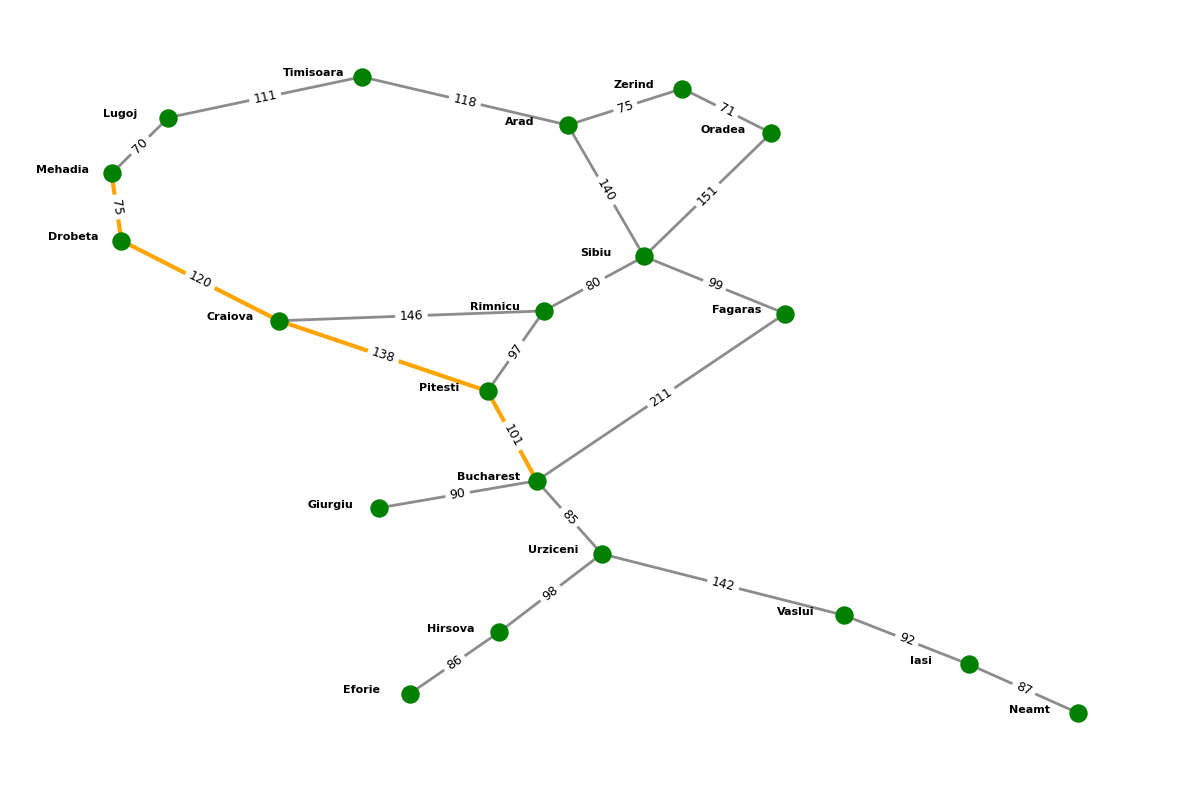

In [44]:
draw_graph(adjac_lis, "Mehadia", "Bucharest")